In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
plt.style.use('dark_background')

def Sys(X, a1, a2, b1, b2, k1=1, k2=1, t=0):
    x = X[0]
    y = X[1]
    return np.array([k1*x*(1-a1*x-a2*y), k2*y*(1-b1*x-b2*y)])
def stationary_points(a1, a2, b1, b2):
    try:
        stat_points = [(0,0), (0,1/b2), (1/a1, 0),
                         ((b2-a2)/(b2*a1-b1*a2), (a1-b1)/(b2*a1-b1*a2)), (0,1/a2), (1/b1,0)]
        return stat_points
    except:
        stat_points = [(0,0), (0,1/b2), (1/a1, 0), (0,1/a2), (1/b1,0)]
        return stat_points
def phase(a1, a2, b1, b2, title, system=Sys, stationary_points=stationary_points, xy_lim = False):
    fig, (ax1, ax) = plt.subplots(ncols=1, nrows = 2, figsize = (25, 30))
    ax1.set_xlim(-0.5, max(1/a1, 1/b1)+0.5)
    ax1.set_ylim(-0.5, max(1/a2, 1/b2)+0.5)
    null_clincs = [(0,1/b2), (1/a1, 0), (0,1/a2), (1/b1,0)]
    null_clincs_str = ['point for null clincs\nu=0, v=1/b2 ',
                       'point for null clincs\nu=1/a1, v=0 ',
                       'point for null clincs\nu=0, v=1/a2 ',
                       'point for null clincs\nu=1/b1, v=0 ']
    clincs_c = ["#0a9411", "#0a948f", "#0a1194", "#940a8f"]
    for i,point in  enumerate(null_clincs):
        ax1.plot(point[0], point[1], c=clincs_c[i], marker='.', markersize=50.0, label = null_clincs_str[i])
    ax1.scatter([0,1/a1,0,1/b1], [1/a2,0,1/b2,0])
    ax1.plot([0,1/a1], [1/a2,0], ls='--', c='white', linewidth=3)
    ax1.plot([0,1/b1], [1/b2,0], ls='--', c='white', linewidth=3)
    ax1.grid(linewidth=3, c='white')
    ax1.xaxis.set_major_locator(tick.FixedLocator([0,0,100]))
    ax1.yaxis.set_major_locator(tick.FixedLocator([0,0,100]))
    ax1.legend(fontsize=15)
    ax1.set_title("Null_clincs "+' '.join(title.split()[2])+f'\n{" ".join(title.split()[3:])}',
                  fontsize=30, loc="left")
    
    
    stat_points = stationary_points(a1 = a1, a2 = a2, b1 = b1, b2 = b2)
    stat_points_str = ['Stationary point №1\nu=0, v=0',
                       'Stationary point №2\nu=0, v=1/b2',
                       'Stationary point №3\nu=1/a1, v=0',
                       'u = (b2-a2)/(b2*a1-b1*a2),\nv = (a1-b1)/(b2*a1-b1*a2) - SP №4',
                       'point for null clincs\nu=0, v=1/a2 ',
                       'point for null clincs\nu=1/b1, v=0 ']
    
    if xy_lim == False:
        x = np.linspace(-0.5, max(1/a1, 1/b1)+0.5, 25)
        y = np.linspace(-0.5, max(1/a2, 1/b2)+0.5, 25)
    else:
        x = np.linspace(xy_lim[0][0], xy_lim[0][1], 25)
        y = np.linspace(xy_lim[1][0], xy_lim[1][1], 25)
    X1 , Y1  = np.meshgrid(x, y)
    DX1, DY1 =system([X1, Y1], a1 = a1, a2 = a2, b1 = b1, b2 = b2)
    M = (np.hypot(DX1, DY1))                                  
    M[ M == 0] = 1.                                           
    DX1 /= M                                                  
    DY1 /= M                             

    marker_clr = ["#0a9411", "#0a948f", "#0a1194", "#940a8f", "#000000", "#000000"]
    if len(stat_points) == 5:
        stat_points_str = stat_points_str[:3] + stat_points_str[4:]
        marker_clr = marker_clr[:3] + marker_clr[4:]
    for i,point in enumerate(stat_points):
        ax.plot(point[0],point[1], marker = ".", markersize = 50.0, label=f"{stat_points_str[i]}",
                 c=marker_clr[i])
    ax.plot([0,1/a1], [1/a2,0], ls='--', c='white', linewidth=3)
    ax.plot([0,1/b1], [1/b2,0], ls='--', c='white', linewidth=3)
    ax.quiver(X1, Y1, DX1, DY1, M, scale=50 ,headwidth=3, pivot='mid', cmap="autumn")
    
    ax.set_title(title, fontsize=30, loc="left")
    ax.legend(fontsize=15, loc='upper right')
    ax.grid(linewidth=3, c='white')
    ax.xaxis.set_major_locator(tick.FixedLocator([0,0,100]))
    ax.yaxis.set_major_locator(tick.FixedLocator([0,0,100]))
    plt.savefig('_'.join(title.split(" ")[:3]))

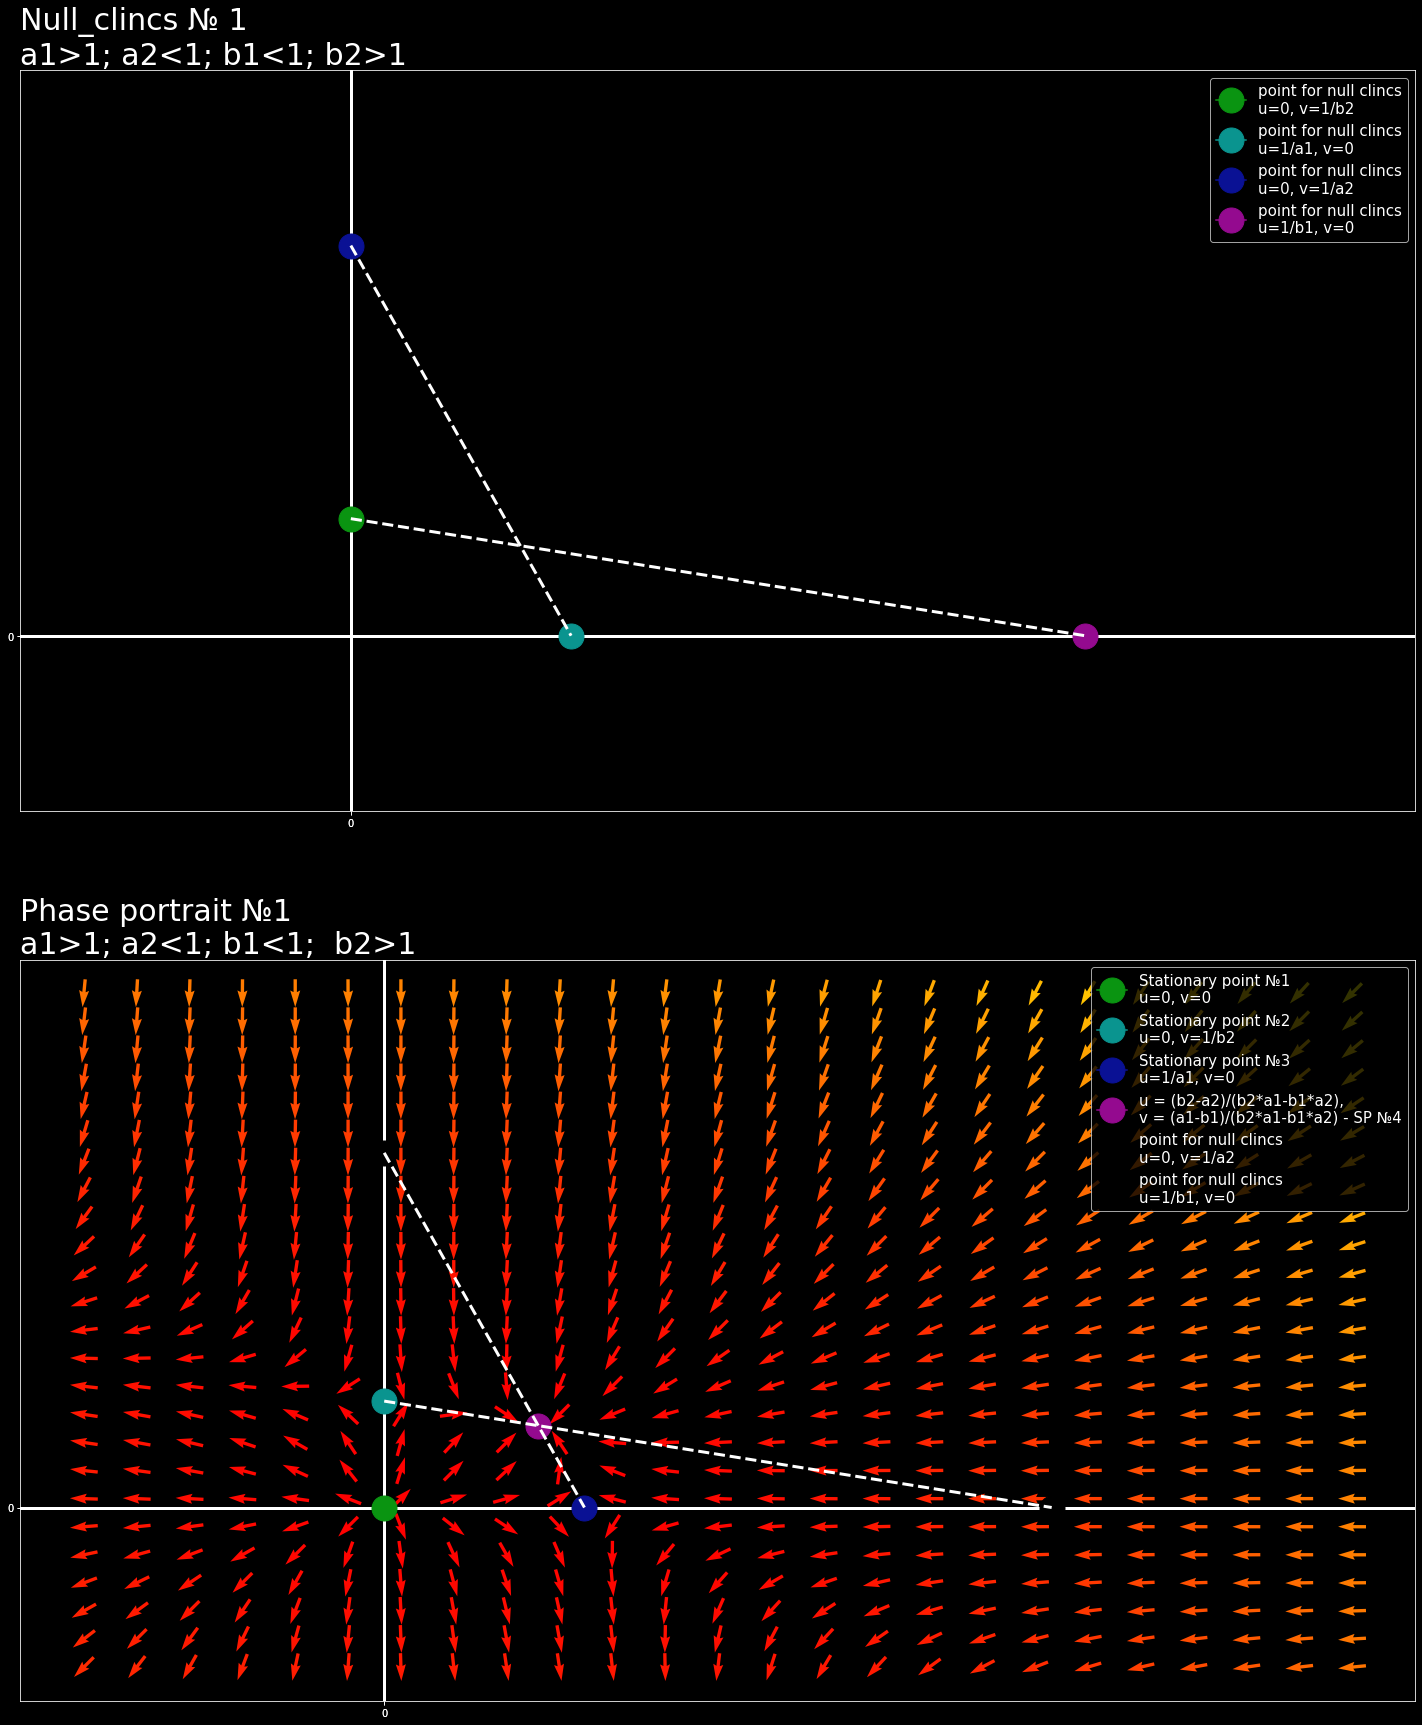

In [28]:
phase(a1=3,a2=0.9,b1=0.9,b2=3, title="Phase portrait №1 \na1>1; a2<1; b1<1;  b2>1")

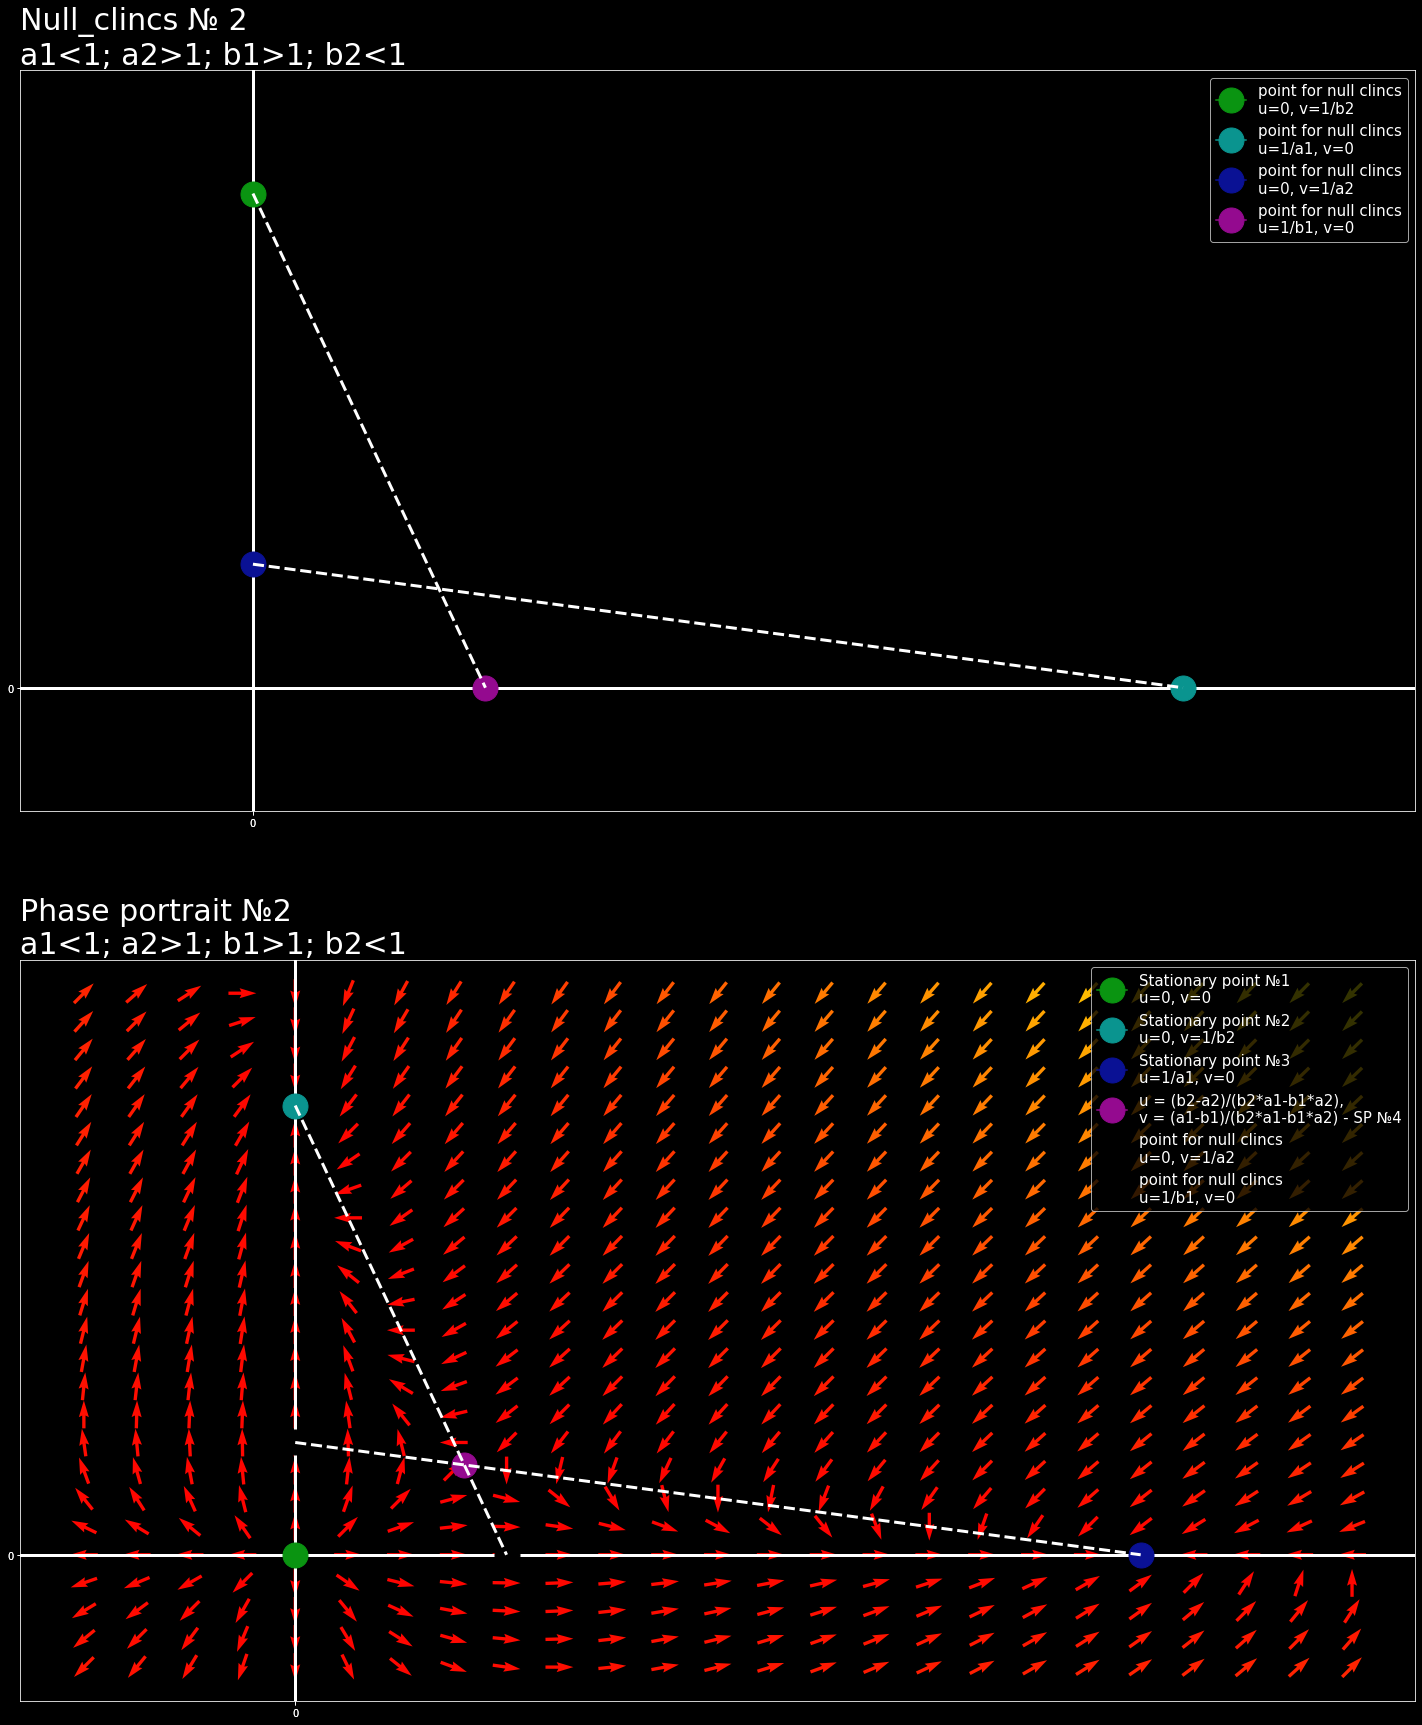

In [29]:
phase(a1=0.5,a2=2,b1=2,b2=0.5, title="Phase portrait №2 \na1<1; a2>1; b1>1; b2<1")

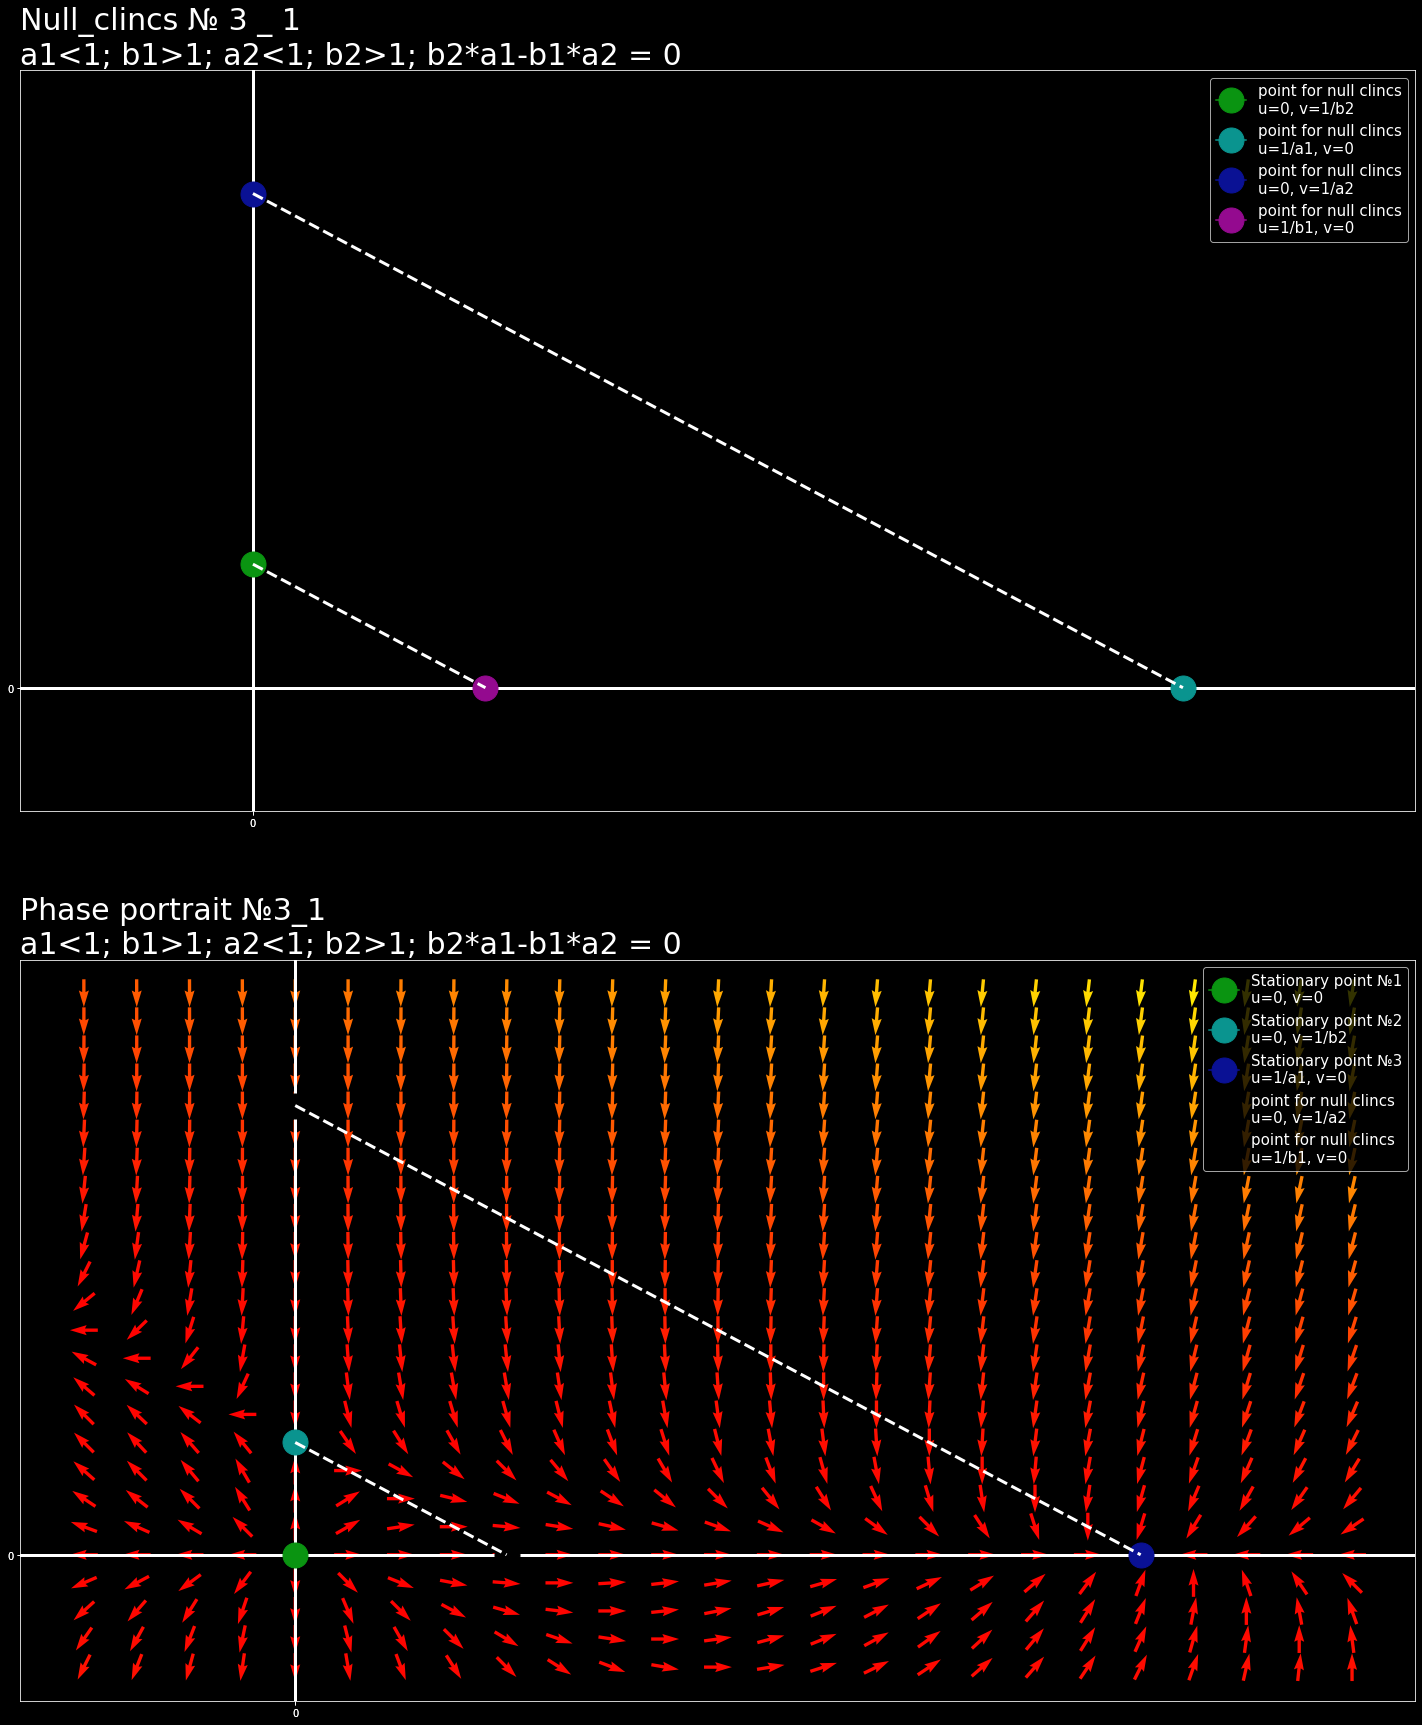

In [30]:
phase(a1=0.5,a2=0.5,b1=2,b2=2, title="Phase portrait №3_1 \na1<1; b1>1; a2<1; b2>1; b2*a1-b1*a2 = 0" )

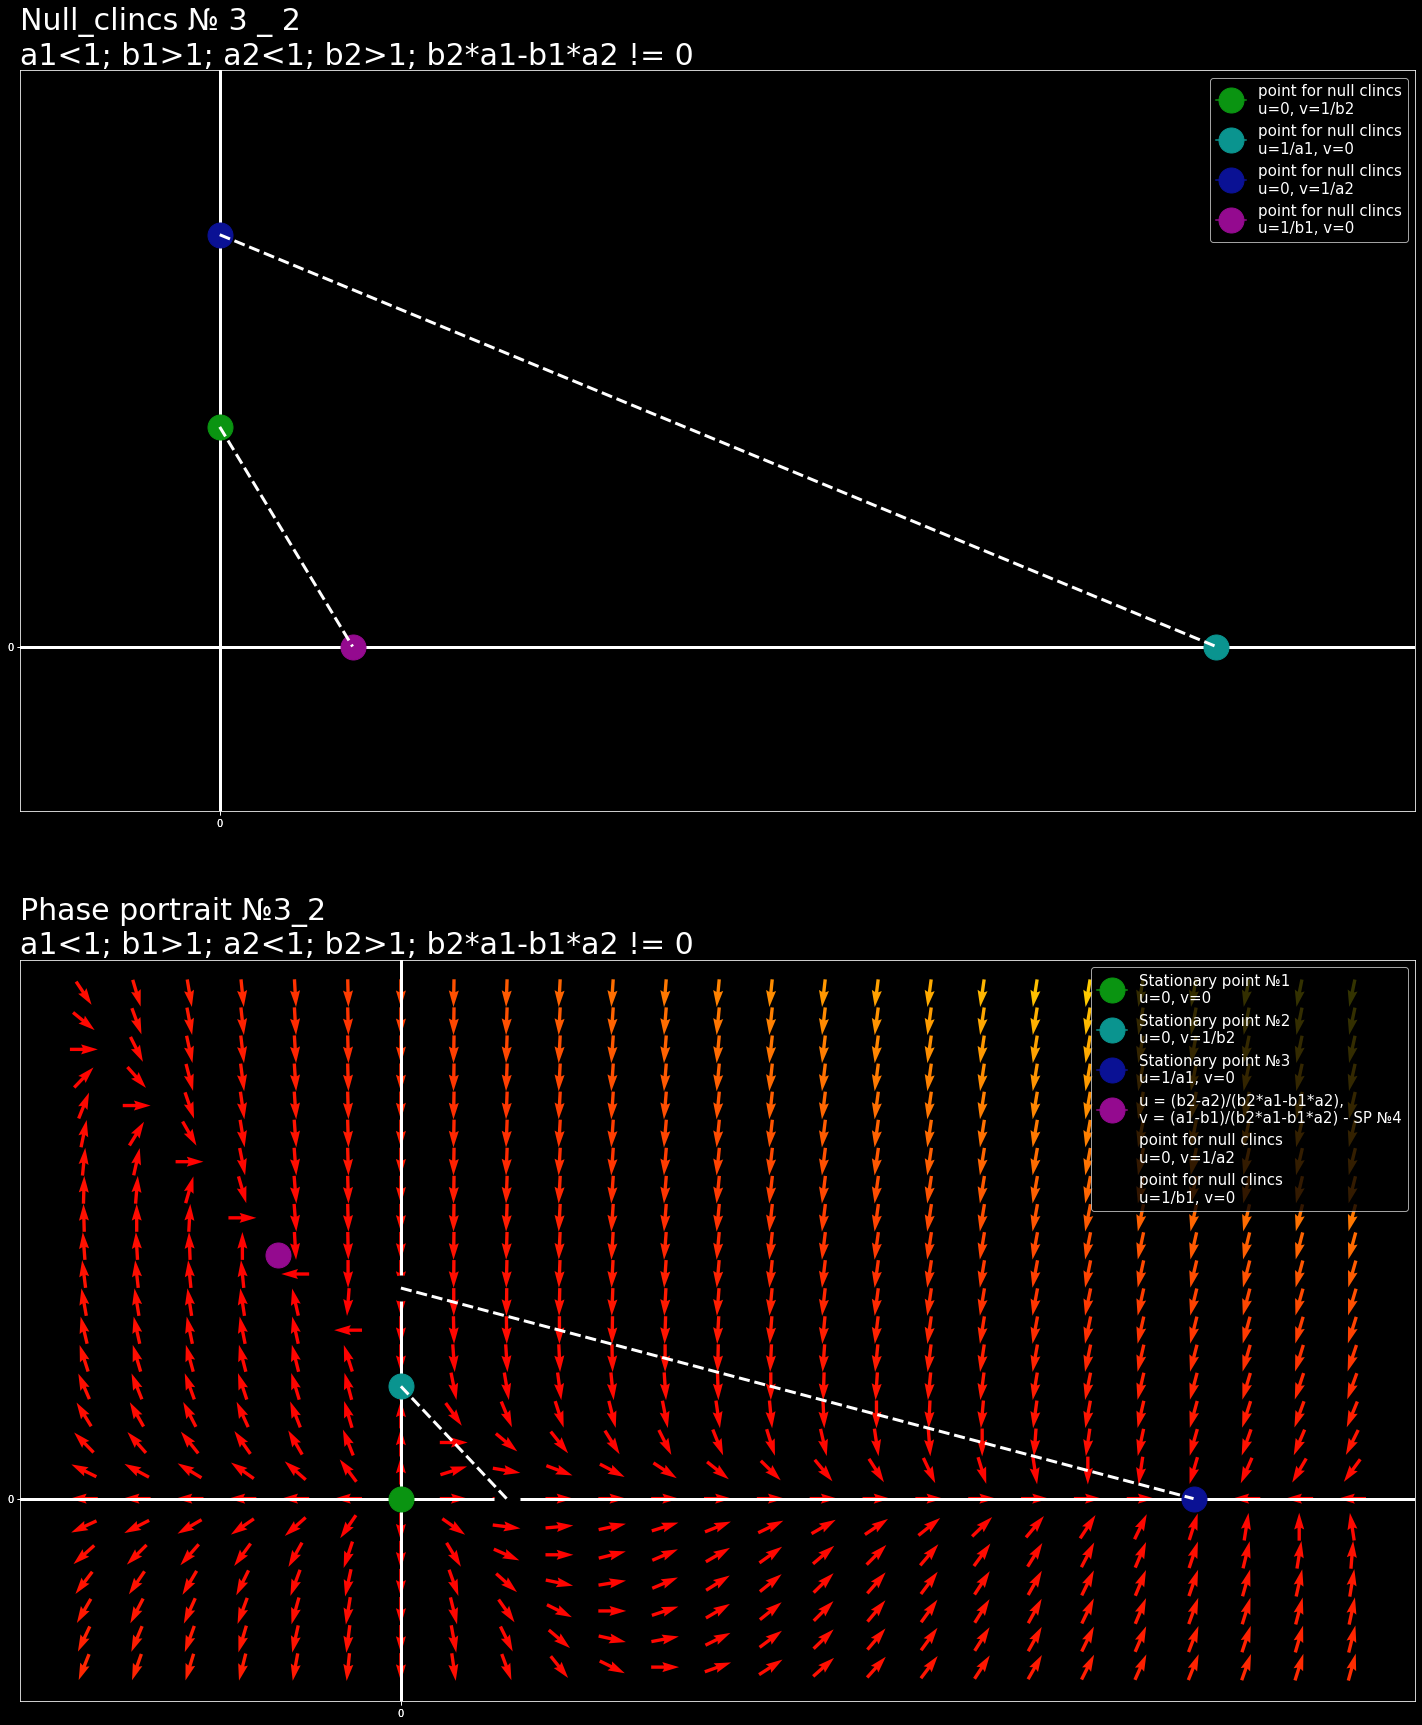

In [31]:
phase(a1=0.4,a2=0.8,b1=3,b2=1.5, title="Phase portrait №3_2 \na1<1; b1>1; a2<1; b2>1; b2*a1-b1*a2 != 0",
      xy_lim=[[-1,3],
              [-1,3]])

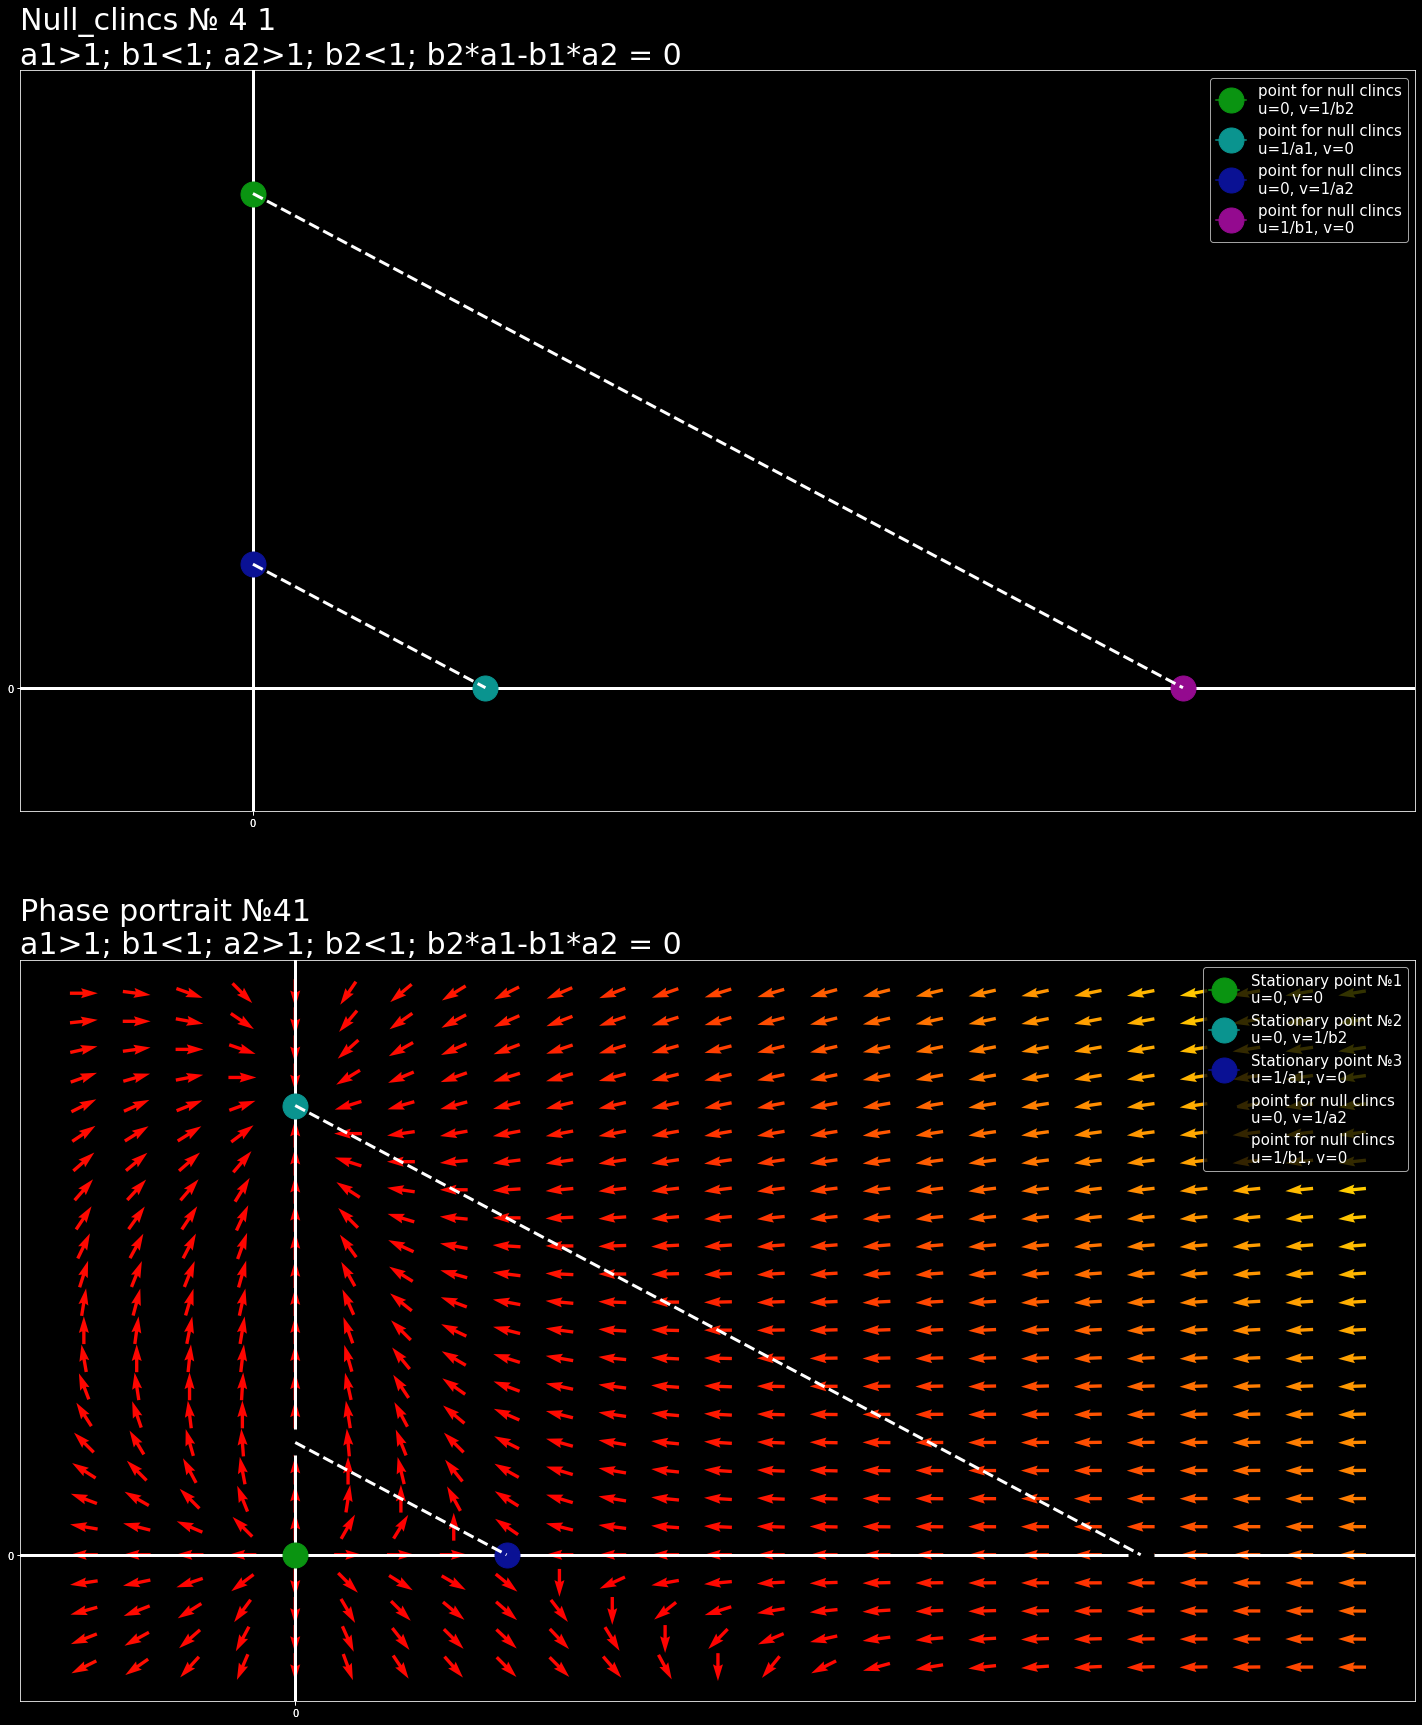

In [32]:
phase(a1=2,a2=2,b1=0.5,b2=0.5, title="Phase portrait №41 \na1>1; b1<1; a2>1; b2<1; b2*a1-b1*a2 = 0")

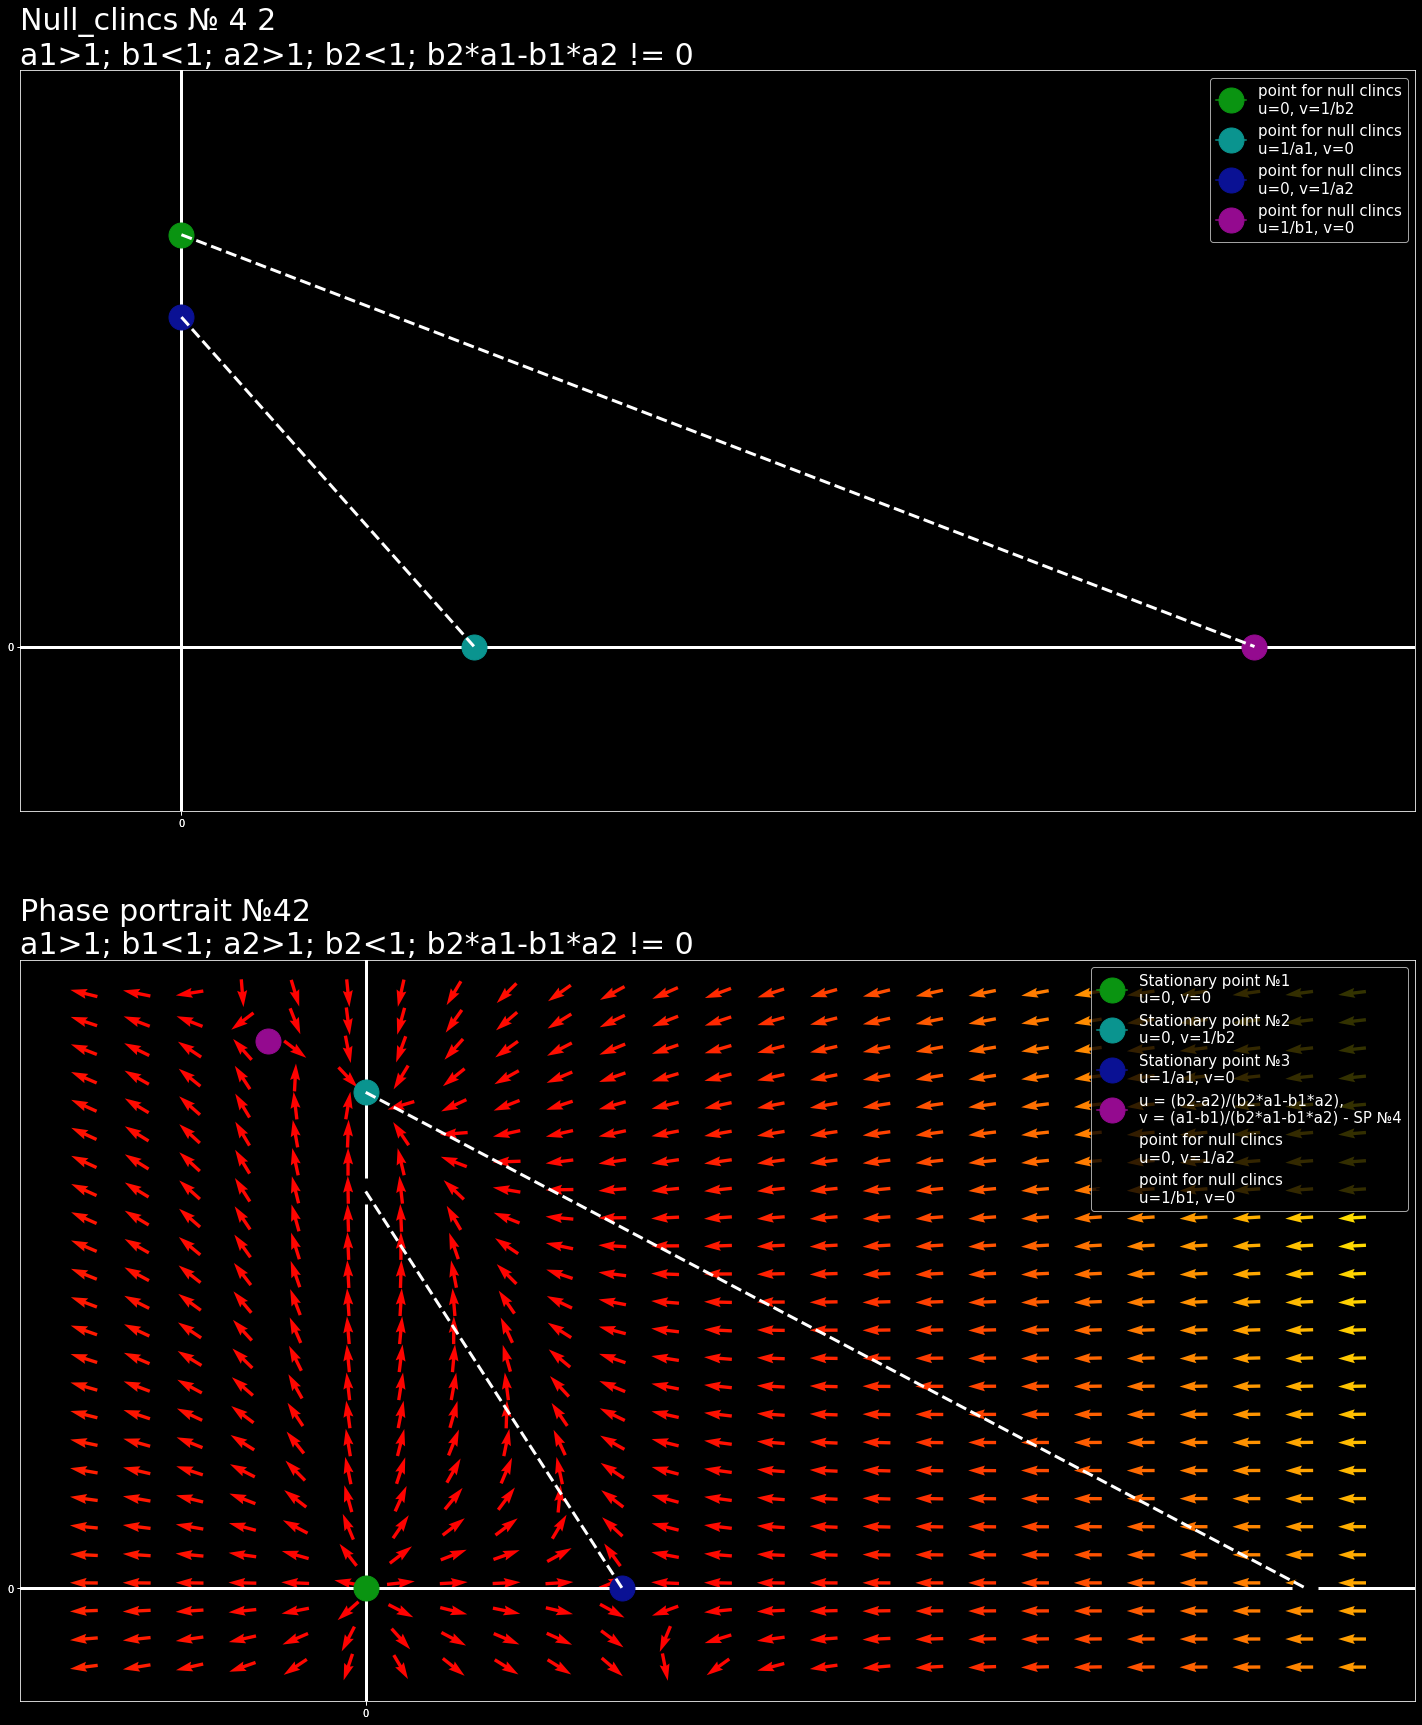

In [33]:
phase(a1=1.1,a2=1,b1=0.3,b2=0.8, title="Phase portrait №42 \na1>1; b1<1; a2>1; b2<1; b2*a1-b1*a2 != 0",
      xy_lim=[[-1,3.5],
              [-0.2,1.5]])